In [923]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics

In [924]:
df = pd.read_csv('datasets/draft2_no_dummies_train.csv')

# Building Model 1
I'm using the most highly correlated features to predict the target, Sale Price. I experimented with using features that had 50+% correlation down to 30+% correlation and found that 40+% correlation produced the best effect.

In [925]:
correlations = pd.DataFrame(df.corr()['saleprice'].sort_values(ascending = False))
correlations.head()

,saleprice
saleprice,1.000000
overall_qual,0.799028
exter_qual,0.710894
gr_liv_area,0.698160
kitchen_qual,0.691090


In [926]:
correlations.rename(columns = {'saleprice': 'corr'}, inplace = True)
correlations.head(16)

,corr
saleprice,1.000000
overall_qual,0.799028
exter_qual,0.710894
gr_liv_area,0.698160
kitchen_qual,0.691090
garage_area,0.648183
garage_cars,0.646337
total_bsmt_sf,0.630484
1st_flr_sf,0.620491
year_built,0.571165


In [927]:
corr_above40_list = correlations[correlations['corr']>.4].index.tolist()

In [928]:
print(type(corr_above40_list))
corr_above40_list

<class 'list'>


['saleprice',
 'overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_built',
 'year_remod/add',
 'full_bath',
 'garage_yr_blt',
 'mas_vnr_area',
 'totrms_abvgrd',
 'has_fireplace',
 'fireplaces',
 'heating_qc',
 'bsmtfin_sf_1',
 'has_mas_vnr']

In [929]:
corr_above40_list.remove('saleprice')

Also removing 'has_mas_vnr' because that is covered by the 'mas_vnr_area' column, so this is redundant.

In [930]:
corr_above40_list.remove('has_mas_vnr')

In [931]:
print(corr_above40_list)

['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd', 'has_fireplace', 'fireplaces', 'heating_qc', 'bsmtfin_sf_1']


In [932]:
X = df[corr_above40_list]
y = df['saleprice']

In [933]:
X.shape

(2028, 18)

In [934]:
X.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,3,1479,3,475.0,2.0,725.0,725,1976,2005,2,1976.0,289.0,6,0,0,4,533.0
1,7,3,2122,3,559.0,2.0,913.0,913,1996,1997,2,1997.0,132.0,8,1,1,4,637.0
2,5,2,1057,3,246.0,1.0,1057.0,1057,1953,2007,1,1953.0,0.0,5,0,0,2,731.0
3,5,2,1444,2,400.0,2.0,384.0,744,2006,2007,2,2007.0,0.0,7,0,0,3,0.0
4,6,2,1445,2,484.0,2.0,676.0,831,1900,1993,2,1957.0,0.0,6,0,0,2,0.0


In [935]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state = 42)

In [936]:
lr1 = LinearRegression()

In [937]:
lr1.fit(X_train_1, y_train_1)

LinearRegression()

In [938]:
cross_val_score(lr1, X_train_1, y_train_1)

array([0.69167705, 0.85295001, 0.86037905, 0.85060954, 0.70403694])

In [939]:
cross_val_score(lr1, X_train_1, y_train_1).mean()

0.7919305177201741

In [940]:
lr1.score(X_train_1, y_train_1)

0.8111813703343252

In [941]:
lr1.score(X_test_1, y_test_1)

0.866416939824109

I'm very happy with this first model. The $r^2$ score for the training data is reasonably high, and the mean of the cross-validation score is also close. The $r^2$ score for the test data is actually higher than for the training data, so the model is not overfit.

In [942]:
preds1 = lr1.predict(X_test_1)
preds1[:5]

array([298465.17831672, 212256.56081416, 170558.89451181, 146694.82772246,
       268849.68945155])

In [943]:
null_pred = y.mean()
null_pred

180839.1701183432

In [944]:
y_test_1.shape

(507,)

In [945]:
null_pred_list = ([null_pred] * 507)
print(len(null_pred_list))
null_pred_list[:5]

507


[180839.1701183432,
 180839.1701183432,
 180839.1701183432,
 180839.1701183432,
 180839.1701183432]

In [946]:
type(null_pred_list)

list

In [947]:
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 1 RMSE: 27740.571413585116
Null Model RMSE: 75922.17182221451


In [948]:
#the mean of the test data.
y_test_1.mean()

178989.57001972388

In [949]:
28173.04/178_989.57

0.15740045635061306

## these numbers aren't up to date
The model RMSE (\\$27740.57) is higher than I'd want in a real world scenario, as it represents an error of ~16\% of the mean sale price in our test data, but the test RMSE represents a significant improvement over the null RMSE (\\$75,922.17)

Hank helped me work out how to put these together in the 4.04 exercise. I'm referencing the code from that exercise here, though I've built on it, as well. I used [this site](https://datatofish.com/round-values-pandas-dataframe/) to review how to round a column of a dataframe, as I wanted to present the coefficients rounded to two decimals to better represent money.

In [950]:
model_1_coefs = pd.DataFrame(lr1.coef_, index = X.columns)
model_1_coefs.rename(columns = {0: "Coefficients"}, inplace = True)
model_1_coefs.sort_values('Coefficients', ascending = False, inplace = True)
model_1_coefs['Coefficients'] = model_1_coefs['Coefficients'].round(decimals = 2)

model_1_coefs

,Coefficients
exter_qual,14867.19
overall_qual,12652.20
kitchen_qual,12561.85
garage_cars,6713.47
has_fireplace,6616.07
fireplaces,5467.41
totrms_abvgrd,2530.01
heating_qc,2321.84
full_bath,551.46
year_remod/add,171.21


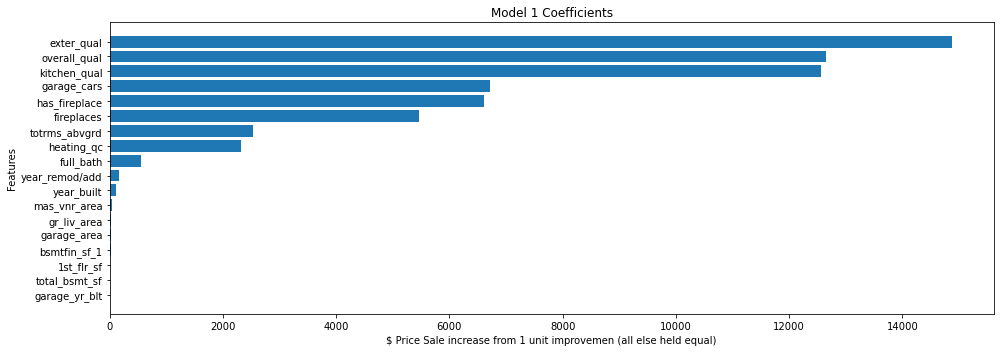

In [951]:
plt.figure(figsize = (14, 5))
plt.title('Model 1 Coefficients')
plt.xlabel('$ Price Sale increase from 1 unit improvemen (all else held equal)')
plt.ylabel('Features')
model_1_coefs.sort_values(['Coefficients'], inplace = True)
plt.barh(model_1_coefs.index, model_1_coefs['Coefficients'])

plt.tight_layout()
plt.savefig('images/coefficients.png');

Thinking ahead to recommendations for homeoweners, some of these (for example, Year Built) will be hard to act directly upon. That said, even Year Built is actionable in the sense that if you're thinking to sell, there's evidence that waiting a year as a small cost of approximately $204/year.

-----

## First Kaggle Attempt

In [952]:
kaggledf = pd.read_csv('datasets/draft2_no_dummies_kaggle_test.csv')
kaggledf.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_surface,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,saleprice,has_bsmt,has_garage,has_mas_vnr,has_pool,has_alley,has_fireplace
0,2658,902301120,190,RM,69.0,9142,1,Grvl,0,Lvl,...,4,2006,WD,0,1,1,0,0,1,0
1,2718,905108090,90,RL,0.0,9662,1,None,1,Lvl,...,8,2006,WD,0,1,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,None,1,Lvl,...,9,2006,New,0,1,1,0,0,0,1
3,1989,902207150,30,RM,60.0,8520,1,None,0,Lvl,...,7,2007,WD,0,1,1,0,0,0,0
4,625,535105100,20,RL,0.0,9500,1,None,1,Lvl,...,7,2009,WD,0,1,1,1,0,0,1


In [953]:
X_k = kaggledf[corr_above40_list]

In [954]:
X_k.shape

(878, 18)

In [955]:
predsk1 = lr1.predict(X_k)

In [956]:
predsk1.shape

(878,)

In [957]:
predsk1[:5]

array([134018.58974402, 178021.65853645, 214263.68535276, 126817.0283539 ,
       184326.26078631])

In [958]:
kaggledf['saleprice'] = predsk1

In [959]:
lr1_submission = kaggledf[['id', 'saleprice']]

In [960]:
lr1_submission.head()

,id,saleprice
0,2658,134018.589744
1,2718,178021.658536
2,2414,214263.685353
3,1989,126817.028354
4,625,184326.260786


I used [this site](https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/) to remind myself of a method to change a column's datatype, as it wasn't an integer.

In [961]:
lr1_submission = lr1_submission.astype({'id': int})

In [962]:
lr1_submission.head()

,id,saleprice
0,2658,134018.589744
1,2718,178021.658536
2,2414,214263.685353
3,1989,126817.028354
4,625,184326.260786


In [963]:
lr1_submission.shape

(878, 2)

In [964]:
lr1_submission.set_index('id', inplace = True)

In [965]:
lr1_submission.head(2)

,saleprice
id,
2658,134018.589744
2718,178021.658536


In [966]:
lr1_submission.to_csv('kaggle_submissions/lr1_submission.csv')

NOTE: I didn't actually submit this version because I'd worked through this whole notebook with the features that have 50%+ correlation. Because these models only get better, I waited until the last one to submit the improved one.

-----

# Model 2 - Interaction Terms using Polynomial Features
I worked through this, evaluated it, then prepped the Kaggle test data.

In [967]:
poly1 = PolynomialFeatures(include_bias = False)

In [968]:
poly1

PolynomialFeatures(include_bias=False)

In [969]:
X_poly_train1 = poly1.fit_transform(X_train_1)

In [970]:
X_poly_test1 = poly1.fit_transform(X_test_1)

In [971]:
X_poly_train1.shape

(1521, 189)

In [972]:
lr2 = LinearRegression()

In [973]:
lr2.fit(X_poly_train1, y_train_1)

LinearRegression()

In [974]:
lr2.score(X_poly_train1, y_train_1)

0.9260018020072728

In [975]:
lr2.score(X_poly_test1, y_test_1)

0.9048685050301546

In [976]:
cross_val_score(lr2, X_poly_train1, y_train_1).mean()

0.8255266695780892

In [977]:
preds2 = lr2.predict(X_poly_test1)

In [978]:
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}') # the test targets didn't change, only the test features (from PolynomialFeatures application) 
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 2 RMSE: 23410.024560528327
Model 1 RMSE: 27740.571413585116
Null Model RMSE: 75922.17182221451


The train and test $r^2$ scores are very close. I'd like mean cross-validation score to be closer to the train $r^2$ as the difference suggests there could be some overfitting.

The Model 2 RMSE of \\24130.42 represents an improvement over lr_1's RMSE (\\28173.043) and, again, a significant improvement over the null RMSE (\\$75,922.17).

Overall, this model represents a step forward.

-----

Prepping data for Kaggle competition:

In [979]:
# for Kaggle DF

X_k_poly_1 = poly1.fit_transform(X_k)

In [980]:
predsk2 = lr2.predict(X_k_poly_1)

In [981]:
lr2submission = lr1_submission.copy()

In [982]:
lr2submission.head()

,saleprice
id,
2658,134018.589744
2718,178021.658536
2414,214263.685353
1989,126817.028354
625,184326.260786


In [983]:
lr2submission['saleprice'] = predsk2

In [984]:
lr2submission.head()

,saleprice
id,
2658,158576.527057
2718,143516.075468
2414,176036.640726
1989,123069.407889
625,194865.425750


In [985]:
lr2submission.to_csv('kaggle_submissions/lr2submission.csv')

Once again, I didn't actually submit this model because there's a better result ahead, which I know from having worked through these models starting from the features with correlations of 50+% and adjusting from there.

-----

## Experimenting with Features

I also created 2 models that removed Overall Quality, one with just the remaining high correlation (50+%) features and one with the interaction terms built on top. My theory was that perhaps Overall Quality was not independent enough of other features, but I found these two models didn't perform as well, so I just stuck with these first 2 models.

-----

# Preparing to Add Categorical Features

## First Step: Building DataFrames with the Model 2 Interaction Terms for Concatenation and Getting Dummies

In order to be sure I had the same dummies in both the training and Kaggle test data, per Katie's suggestion I concatenated the two dataframes before 

In [986]:
corr_above40df = df[corr_above40_list]

In [987]:
corr_above40df.head(2)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,3,1479,3,475.0,2.0,725.0,725,1976,2005,2,1976.0,289.0,6,0,0,4,533.0
1,7,3,2122,3,559.0,2.0,913.0,913,1996,1997,2,1997.0,132.0,8,1,1,4,637.0


In [988]:
corr_40_interactions = poly1.fit_transform(corr_above40df)

I took this code from the feature engineering lesson:

In [989]:
corr_40_interactions = pd.DataFrame(corr_40_interactions, columns = poly1.get_feature_names_out(corr_above40df.columns))


In [990]:
corr_40_interactions.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,3.0,1479.0,3.0,475.0,2.0,725.0,725.0,1976.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2132.0,284089.0
1,7.0,3.0,2122.0,3.0,559.0,2.0,913.0,913.0,1996.0,1997.0,...,1.0,1.0,4.0,637.0,1.0,4.0,637.0,16.0,2548.0,405769.0
2,5.0,2.0,1057.0,3.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1462.0,534361.0
3,5.0,2.0,1444.0,2.0,400.0,2.0,384.0,744.0,2006.0,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
4,6.0,2.0,1445.0,2.0,484.0,2.0,676.0,831.0,1900.0,1993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [991]:
corr_40_interactions.shape

(2028, 189)

In [992]:
corr_40_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,3.0,1479.0,3.0,475.0,2.0,725.0,725.0,1976.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2132.0,284089.0


In [993]:
corr_40_interactions['overall_qual'].head()

0    6.0
1    7.0
2    5.0
3    5.0
4    6.0
Name: overall_qual, dtype: float64

I referenced [this webpage](https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/) to review how to return the 'saleprice' column to the new dataframe.

In [994]:
corr_40_interactions = corr_40_interactions.join(df['saleprice'])

In [995]:
corr_40_interactions.shape

(2028, 190)

### Categorical Features
I opted to add Neighborhood, Zoning, House Style, Building Type, Lot Configuration, and Condition 1 into the model. 

In a later model, I experimented with adding Month Sold, Masonry Veneer Type, Miscellaneous Features, and Condition 2, but found the model didn't offer more than the most marginal improvement, and I was concernd it was overfit, so I've stuck with these categorical features, below.

In [996]:
cats1 = ['neighborhood', 'ms_zoning', 'house_style', 'bldg_type', 'lot_config', 'condition_1']

In [997]:
corr_40_interactions_cats1 = corr_40_interactions.copy()
for cat in cats1:
    corr_40_interactions_cats1 = corr_40_interactions_cats1.join(df[cat])

In [998]:
corr_40_interactions_cats1.shape

(2028, 196)

In [999]:
X_k.shape

(878, 18)

In [1000]:
X_k.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,2,1928,1,440,1,1020,908,1910,1950,2,1910.0,0.0,9,0,0,3,0
1,5,2,1967,2,580,2,1967,1967,1977,1977,2,1977.0,0.0,10,0,0,2,0
2,7,3,1496,3,426,2,654,664,2006,2006,2,2006.0,0.0,7,1,1,4,554
3,5,3,968,2,480,2,968,968,1923,2006,1,1935.0,0.0,5,0,0,2,0
4,6,2,1394,2,514,2,1394,1394,1963,1963,1,1963.0,247.0,6,1,2,3,609


In [1001]:
kaggle_interactions = poly1.fit_transform(X_k)

In [1002]:
kaggle_interactions = pd.DataFrame(kaggle_interactions, 
                                   columns = poly1.get_feature_names_out(X_k.columns))


In [1003]:
kaggle_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,2.0,1928.0,1.0,440.0,1.0,1020.0,908.0,1910.0,1950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [1004]:
kaggle_interactions.shape

(878, 189)

In [1005]:
kaggle_interactions['saleprice'] = 0

In [1006]:
kaggle_interactions.shape

(878, 190)

In [1007]:
kaggle_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice
0,6.0,2.0,1928.0,1.0,440.0,1.0,1020.0,908.0,1910.0,1950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0


In [1008]:
kaggle_interactions_cats1 = kaggle_interactions.copy()
for cat in cats1:
    kaggle_interactions_cats1 = kaggle_interactions_cats1.join(kaggledf[cat])

In [1009]:
kaggle_interactions_cats1.shape

(878, 196)

-----

I concatenated the two dataframes here to prepare them to cast dummy columns for these categories. I needed to review the documentation on pd.concat to get this written correctly.

In [1010]:
for_dummy_df = pd.concat([corr_40_interactions_cats1, kaggle_interactions_cats1])

In [1011]:
for_dummy_df.shape

(2906, 196)

-----

I cast the dummies, next.

In [1012]:
all_with_dummies = pd.get_dummies(columns = cats1, drop_first = True, data = for_dummy_df)

In [1013]:
all_with_dummies.shape

(2906, 246)

-----

Now, I break this dataframe back into the training set and the Kaggle test set.

In [1014]:
dummydf = all_with_dummies.iloc[:2028]

In [1015]:
dummydf.shape

(2028, 246)

In [1016]:
kaggledummydf = all_with_dummies.iloc[2028:]

In [1017]:
kaggledummydf.shape

(878, 246)

I'm going to compare the number of rows and the first five columns to make sure I've returns the right rows to the datafram.

In [1018]:
kaggle_interactions_cats1.shape

(878, 196)

In [1019]:
kaggle_interactions_cats1.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice,neighborhood,ms_zoning,house_style,bldg_type,lot_config,condition_1
0,6.0,2.0,1928.0,1.0,440.0,1.0,1020.0,908.0,1910.0,1950.0,...,9.0,0.0,0.0,0,OldTown,RM,2Story,2fmCon,Inside,Norm
1,5.0,2.0,1967.0,2.0,580.0,2.0,1967.0,1967.0,1977.0,1977.0,...,4.0,0.0,0.0,0,Sawyer,RL,1Story,Duplex,Inside,Norm
2,7.0,3.0,1496.0,3.0,426.0,2.0,654.0,664.0,2006.0,2006.0,...,16.0,2216.0,306916.0,0,Gilbert,RL,2Story,1Fam,Inside,Norm
3,5.0,3.0,968.0,2.0,480.0,2.0,968.0,968.0,1923.0,2006.0,...,4.0,0.0,0.0,0,OldTown,RM,1Story,1Fam,Inside,Norm
4,6.0,2.0,1394.0,2.0,514.0,2.0,1394.0,1394.0,1963.0,1963.0,...,9.0,1827.0,370881.0,0,NAmes,RL,1Story,1Fam,Inside,Norm


In [1020]:
kaggledummydf.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,lot_config_FR3,lot_config_Inside,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn
0,6.0,2.0,1928.0,1.0,440.0,1.0,1020.0,908.0,1910.0,1950.0,...,0,1,0,1,0,0,0,0,0,0
1,5.0,2.0,1967.0,2.0,580.0,2.0,1967.0,1967.0,1977.0,1977.0,...,0,1,0,1,0,0,0,0,0,0
2,7.0,3.0,1496.0,3.0,426.0,2.0,654.0,664.0,2006.0,2006.0,...,0,1,0,1,0,0,0,0,0,0
3,5.0,3.0,968.0,2.0,480.0,2.0,968.0,968.0,1923.0,2006.0,...,0,1,0,1,0,0,0,0,0,0
4,6.0,2.0,1394.0,2.0,514.0,2.0,1394.0,1394.0,1963.0,1963.0,...,0,1,0,1,0,0,0,0,0,0


In [1021]:
dummydf.shape

(2028, 246)

In [1022]:
corr_40_interactions_cats1.shape

(2028, 196)

In [1023]:
corr_40_interactions_cats1.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice,neighborhood,ms_zoning,house_style,bldg_type,lot_config,condition_1
0,6.0,3.0,1479.0,3.0,475.0,2.0,725.0,725.0,1976.0,2005.0,...,16.0,2132.0,284089.0,130500,Sawyer,RL,2Story,1Fam,CulDSac,RRAe
1,7.0,3.0,2122.0,3.0,559.0,2.0,913.0,913.0,1996.0,1997.0,...,16.0,2548.0,405769.0,220000,SawyerW,RL,2Story,1Fam,CulDSac,Norm
2,5.0,2.0,1057.0,3.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,...,4.0,1462.0,534361.0,109000,NAmes,RL,1Story,1Fam,Inside,Norm
3,5.0,2.0,1444.0,2.0,400.0,2.0,384.0,744.0,2006.0,2007.0,...,9.0,0.0,0.0,174000,Timber,RL,2Story,1Fam,Inside,Norm
4,6.0,2.0,1445.0,2.0,484.0,2.0,676.0,831.0,1900.0,1993.0,...,4.0,0.0,0.0,138500,SawyerW,RL,1.5Fin,1Fam,Inside,Norm


In [1024]:
dummydf.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,...,lot_config_FR3,lot_config_Inside,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn
0,6.0,3.0,1479.0,3.0,475.0,2.0,725.0,725.0,1976.0,2005.0,...,0,0,0,0,0,0,1,0,0,0
1,7.0,3.0,2122.0,3.0,559.0,2.0,913.0,913.0,1996.0,1997.0,...,0,0,0,1,0,0,0,0,0,0
2,5.0,2.0,1057.0,3.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,...,0,1,0,1,0,0,0,0,0,0
3,5.0,2.0,1444.0,2.0,400.0,2.0,384.0,744.0,2006.0,2007.0,...,0,1,0,1,0,0,0,0,0,0
4,6.0,2.0,1445.0,2.0,484.0,2.0,676.0,831.0,1900.0,1993.0,...,0,1,0,1,0,0,0,0,0,0


The two new dfs are the same length as the old ones and the heads match so the operation appears successful.

-----

# Model 3 - With Categorical Features Added to Model 2 Features

In [1025]:
X_3 = dummydf.drop(columns = 'saleprice')
y_3 = dummydf['saleprice']

In [1026]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state = 42)

In [1027]:
lr3 = LinearRegression()

In [1028]:
lr3.fit(X_train_3, y_train_3) 

LinearRegression()

In [1029]:
lr3.score(X_train_3, y_train_3)

0.9407500661954166

In [1030]:
lr3.score(X_test_3, y_test_3)

0.9107271500535393

In [1031]:
cross_val_score(lr3, X_train_3, y_train_3).mean()

0.8401716249377266

The train and test $r^2$ scores are acceptably close together. I'd like the mean cross-validation score and the model $r^2$ score to be closer together. This suggests that the model is a little overfit, though the test $r^2$ was pretty close to the train $r^2$ score, so I think the difference is acceptable.

In [1032]:
preds3 = lr3.predict(X_test_3)
preds3[:5]

array([278427.05136011, 200567.37699959, 164821.93310686, 163262.86908415,
       291295.31193547])

In [1033]:
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 3 RMSE: 22677.72101452241
Model 2 RMSE: 23410.024560528327
Model 1 RMSE: 27740.571413585116
Null Model RMSE: 75922.17182221451


### Tracking Changes in Categorical Variables
**these values are out of date**
As I experimented with categorical variables, I tracked changes in RMSE ($r^2$ and cross-validation scores were all similar). This list is in reverse chronological order, with the first combination at the bottom.

with condition 2:
the Model 3 RMSE went up slightly from without condition 2

with condition 1:\
Model 3 RMSE: 23231.293915501905

with lot config, month sold removed|
Model 3 RMSE: 23591.80550467187

with month sold and 'lot_config'\
Model 3 RMSE: 23661.88317929057

with month sold added\
Model 3 RMSE: 23834.93569305083\

with 'neighborhood', 'ms_zoning', 'house_style', 'bldg_type':\
Model 3 RMSE: 23780.997587462098

**Overall, Model 3 represents a clear improvement over Models 2 and 1, all models being quite a bit better than the null model.**

-----

Preparing Kaggle Data on Model 3 for Submission

In [1034]:
X_k_3 = kaggledummydf.drop(columns = 'saleprice')

In [1035]:
predsk3 = lr3.predict(X_k_3)
predsk3[:5]

array([150510.13740814, 148167.15386586, 182604.94917744, 109919.91047877,
       187772.8182285 ])

In [1036]:
lr3_submission = pd.DataFrame(predsk3)

In [1037]:
lr3_submission.head()

,0
0,150510.137408
1,148167.153866
2,182604.949177
3,109919.910479
4,187772.818228


In [1038]:
lr3_submission = lr3_submission.join(kaggledf['id'])
lr3_submission.rename(columns = {'id': 'Id',
                                 0: 'SalePrice'}, inplace = True)
lr3_submission.set_index('Id', inplace = True)

In [1039]:
lr3_submission.head(2)

,SalePrice
Id,
2658,150510.137408
2718,148167.153866


In [1040]:
lr3_submission.columns

Index(['SalePrice'], dtype='object')

In [1041]:
lr3_submission.to_csv('kaggle_submissions/lr3_submission.csv')

Again, I didn't actually submit this model, as there are better ones further along.

-----

# Model 4 -- Ridge Model
Working from Model 3 (lr3) features.

I referred to the Regularization lesson when I set this up, and used the same parameters.

In [1042]:
sc = StandardScaler()
Z_train_3 = sc.fit_transform(X_train_3)
Z_test_3 = sc.transform(X_test_3)

In [1043]:
alphas = np.logspace(1, 5, 100)
ridge_cv1 = RidgeCV(alphas = alphas, cv = 5)
ridge_cv1.fit(Z_train_3, y_train_3)

RidgeCV(alphas=array([1.00000000e+01, 1.09749877e+01, 1.20450354e+01, 1.32194115e+01,
       1.45082878e+01, 1.59228279e+01, 1.74752840e+01, 1.91791026e+01,
       2.10490414e+01, 2.31012970e+01, 2.53536449e+01, 2.78255940e+01,
       3.05385551e+01, 3.35160265e+01, 3.67837977e+01, 4.03701726e+01,
       4.43062146e+01, 4.86260158e+01, 5.33669923e+01, 5.85702082e+01,
       6.42807312e+01, 7.05480231e+0...
       1.17681195e+04, 1.29154967e+04, 1.41747416e+04, 1.55567614e+04,
       1.70735265e+04, 1.87381742e+04, 2.05651231e+04, 2.25701972e+04,
       2.47707636e+04, 2.71858824e+04, 2.98364724e+04, 3.27454916e+04,
       3.59381366e+04, 3.94420606e+04, 4.32876128e+04, 4.75081016e+04,
       5.21400829e+04, 5.72236766e+04, 6.28029144e+04, 6.89261210e+04,
       7.56463328e+04, 8.30217568e+04, 9.11162756e+04, 1.00000000e+05]),
        cv=5)

In [1044]:
ridge_cv1.best_score_

0.8843794725289728

In [1045]:
print(f'Training score: {ridge_cv1.score(Z_train_3, y_train_3)}')
print(f'Test score: {ridge_cv1.score(Z_test_3, y_test_3)}')

Training score: 0.923744553158001
Test score: 0.9208389658108526


In [1046]:
cross_val_score(ridge_cv1, Z_train_3, y_train_3).mean()

0.860071115873301

The training and test $r^2% scores are almost identical, which is excellent. The mean cross-validation score is close, too. This model looks strong.

The Model 3 training $r^2$ is slightly higher than the training $r^2$ for this model, but the test $r^2$ and cross-validation scores are slightly higher here than on Model 3

In [1047]:
preds4 = ridge_cv1.predict(Z_test_3)
preds4[:5]

array([291361.17887424, 200418.38906432, 170188.81331806, 167403.37792088,
       297972.98606955])

In [1048]:
metrics.mean_squared_error(y_test_3, preds4, squared = False)

21354.796549617044

In [1049]:
print(f'Model 4 (Ridge) RMSE: {metrics.mean_squared_error(y_test_3, preds4, squared = False)}')
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 4 (Ridge) RMSE: 21354.796549617044
Model 3 RMSE: 22677.72101452241
Model 2 RMSE: 23410.024560528327
Model 1 RMSE: 27740.571413585116
Null Model RMSE: 75922.17182221451


The Ridge model represents an improvement the best RMSE yet. I also developed a LASSO model, but Ridge was better.

Below, I'm going to put together a couple of visuals on it.

In [1050]:
rmsedf = pd.DataFrame([['Model 4 (Ridge)', metrics.mean_squared_error(y_test_3, preds4, squared = False)],
                     ['Null Model', metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)]],
                     columns = ['Model', 'RMSE'])
rmsedf

,Model,RMSE
0,Model 4 (Ridge),21354.796550
1,Null Model,75922.171822


I used the example from [this site](https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python) to understand how to make these two bars different colors.

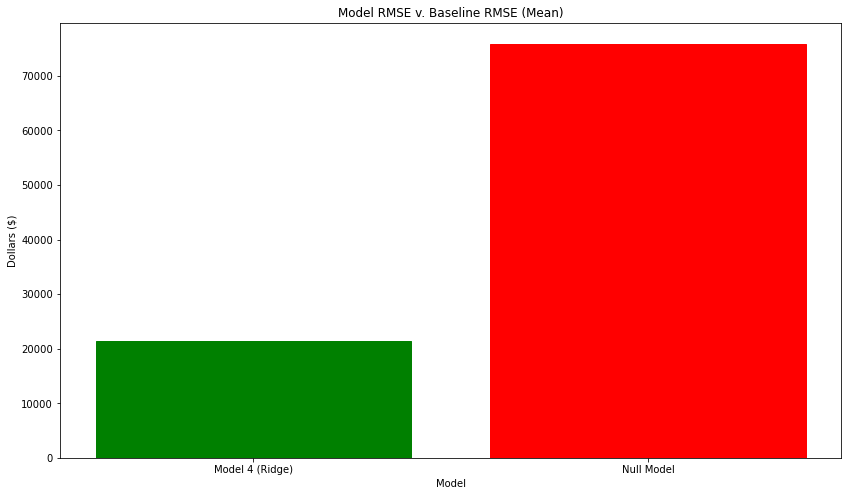

In [1051]:
plt.figure(figsize = (14, 8))
plt.title('Model RMSE v. Baseline RMSE (Mean)')
plt.ylabel('Dollars ($)')
plt.xlabel('Model')
barlist = plt.bar(rmsedf['Model'], rmsedf['RMSE'])
barlist[0].set_color('green')
barlist[1].set_color('red')

plt.show()

# this figure wouldn't save properly (the result was a blank image). I couldn't find a solution online so screenshotted it for now.
# plt.tight_layout()
# plt.savefig('images/rmse_bar_graph.jpg');

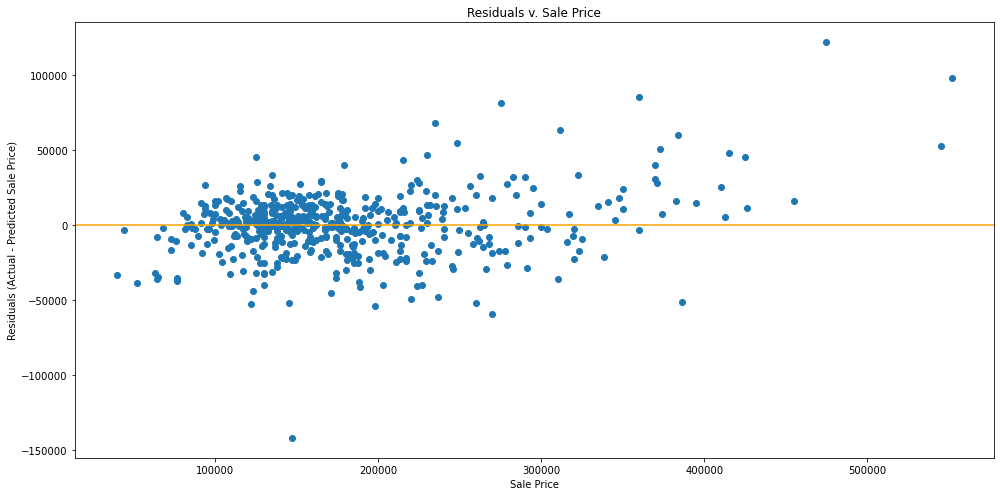

In [1052]:
residuals = y_test_3 - preds4

plt.figure(figsize = (14, 7))
plt.title('Residuals v. Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Residuals (Actual - Predicted Sale Price)')
plt.scatter(y_test_3, residuals)
plt.axhline(0, color = 'orange')

plt.tight_layout()
plt.savefig('images/resid_actual_ridge.png');

The scatterplot of residuals isn't exactly random, but it's not egregious, either. Instead, it seems as if the estimates start to start to float higher, particularly above the 300,000 dollar sale price mark. This suggests that estimates for higher priced homes are likely to be a bit high. Lower priced homes (under $75,000) appear to be a little underestimated on the whole.

I used the code below in my lab 3.01. I needed a lot of help to put this graph together. Here are my original sources, quoting from my lab 3.01:

_I used this [stackoverflow](https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data) to understand how to put in the y = x line to help with interpretation of the scatterplot. The idea of using the subplot is in the first answer. I also took the chunk of code to establish the lims and plot them against each other from that answer. I changed the color to orange (taking out 'k-' and adding 'color = 'orange'') to fit my scheme elsewhere, but otherwise those lines (from lims = to ax.set_ylim(lims)) from that answer._

_I also used [this site](https://www.statology.org/subplot-size-matplotlib/') to review how to adjust the figure size for a subplot. I used [this site](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib) to review how to change the title of a subplot. I inferred from this how to change the xlabel and ylabel._

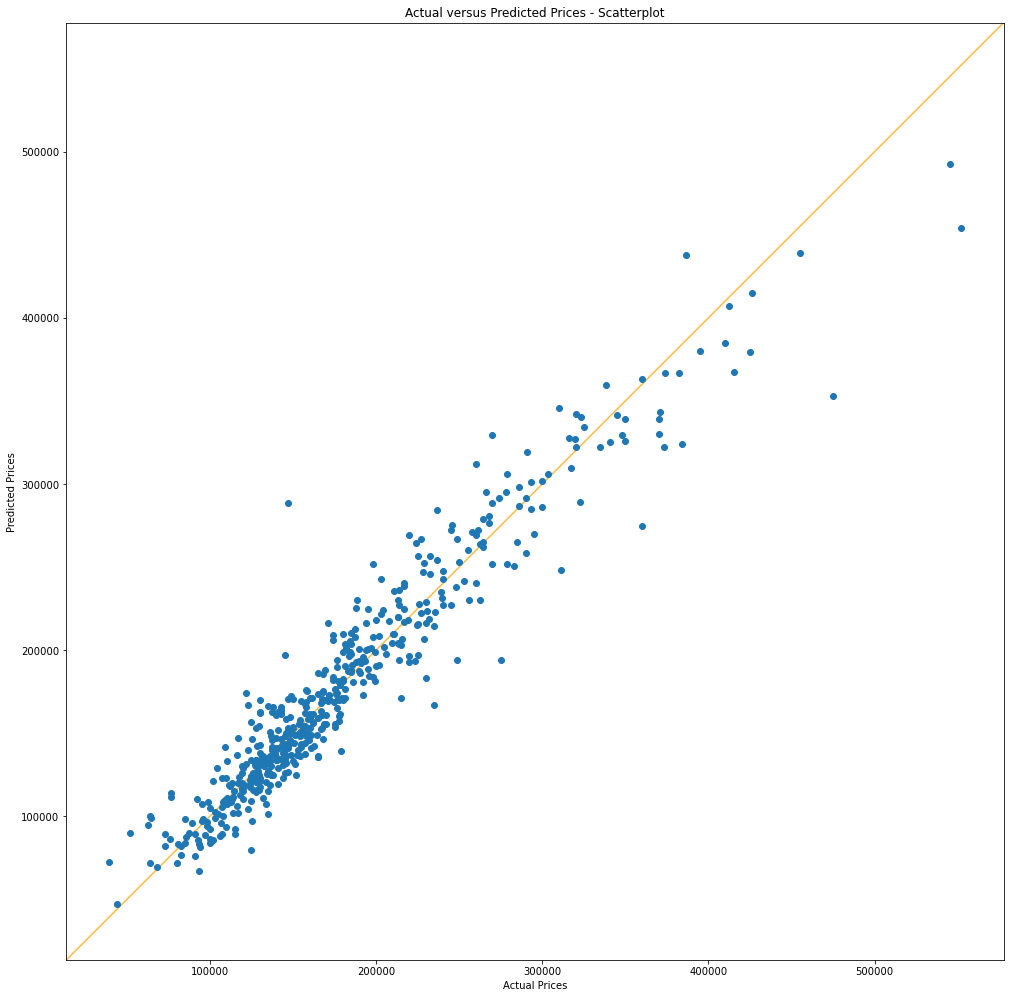

In [1053]:
fig, ax = plt.subplots(figsize = (14,14))

ax.scatter(y_test_3, preds4)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, alpha=0.75, zorder=0, color = 'orange')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Actual versus Predicted Prices - Scatterplot')
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')

plt.tight_layout()
plt.savefig('images/act_v_pred_ridge.png');

This shows a pretty balanced, linear distribution of predicted and actual prices, which supports the idea that the model is solid.

-----

# Model 5 -- LASSO Model, using features developed for Model 3

I worked off the Regularization lesson to set this up and used the same parameters.

In [1054]:
l_alphas = np.logspace(-3, 0, 100)

lasso_cv1 = LassoCV(alphas = l_alphas)

lasso_cv1.fit(Z_train_3, y_train_3)

/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212965069101.0041, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194433651216.7389, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182253850883.46442, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/o

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [1056]:
lasso_cv1.score(Z_train_3, y_train_3)

0.9370166944100096

In [1057]:
lasso_cv1.score(Z_test_3, y_test_3)

0.9146758627055009

In [1058]:
cross_val_score(lasso_cv1, Z_train_3, y_train_3).mean()

/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159617708935.05362, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147210691795.19135, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137319025390.74698, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn

0.8551356419240461

The train and test $r^2$ scores are close to each other and similar to Models 3 and 4. The mean cross-validation score of 85.0% is close to the $r^2$. The model is looking well-fit.

In [1059]:
preds5 = lasso_cv1.predict(Z_test_3)
preds5[:5]

array([277061.63606101, 196172.61058118, 163556.12225943, 172260.10807185,
       293101.73316877])

In [1060]:
metrics.mean_squared_error(y_test_3, preds5, squared = False)

22170.508872200786

In [1061]:
print(f'Model 6 (Lasso) RMSE: {metrics.mean_squared_error(y_test_3, preds5, squared = False)}')
print(f'Model 4 (Ridge) RMSE: {metrics.mean_squared_error(y_test_3, preds4, squared = False)}')
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 6 (Lasso) RMSE: 22170.508872200786
Model 4 (Ridge) RMSE: 21354.796549617044
Model 3 RMSE: 22677.72101452241
Model 2 RMSE: 23410.024560528327
Model 1 RMSE: 27740.571413585116
Null Model RMSE: 75922.17182221451


The RMSE is actually up a bit from the Ridge model. For the purposes of the Kaggle competition, I'm going to make my last entry from the Ridge model.

-----

# Prepping Kaggle Data with Model 5 (Ridge)

In [1062]:
Z_kaggle_3 = sc.transform(X_k_3)

In [1063]:
predsk5 = ridge_cv1.predict(Z_kaggle_3)
predsk5[:5]

array([130515.99113776, 159731.31138618, 195229.94936383, 111203.37626913,
       181213.48953172])

In [1064]:
ridge_cv1_submission = lr3_submission.copy()

ridge_cv1_submission.head(2)

,SalePrice
Id,
2658,150510.137408
2718,148167.153866


In [1065]:
ridge_cv1_submission['SalePrice'] = predsk5

In [1066]:
ridge_cv1_submission.head()

,SalePrice
Id,
2658,130515.991138
2718,159731.311386
2414,195229.949364
1989,111203.376269
625,181213.489532


In [1067]:
ridge_cv1_submission.to_csv('kaggle_submissions/ridge_cv1_submission.csv')